# Regressão Linear - Predição da Idade

### importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

O arquivo 'train' é de treino e o 'test' para testes.

In [2]:
train = pd.read_csv('titanic/train.csv')

In [3]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

Aqui nos vamos colocar a coluna Passageiro como index no pandas. Ou seja, vai ser a coluna index

In [4]:
train.set_index('PassengerId', inplace=True)

In [5]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

O arquivo test nao possui a colona 'Survived' porque é de teste para os alunos saberem fazer a predição de quantas pessoas morreram ou sobreviveram, mas no nosso caso vamos usar o arquivo somente para fazer a regressao linear (prediçao) de idades

In [6]:
test.shape, train.shape

((418, 10), (891, 11))

### Criar coluna "Survived" no test set

In [7]:
test['Survived'] = np.nan  # Criamos a coluna survived mas com valores em branco

### Conferir shape novamente

In [8]:
test.shape, train.shape  # Como podemos ver add outra coluna

((418, 11), (891, 11))

### Concatenar train e test set

Esse sort é para ordenar de acordo com o id, nesse caso colocando como false ele vai colocar o arquivo teste no final do arquivo train

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
data.shape  # Concatenamos os 2 arquivos

(1309, 11)

### Traduzir colunas

In [11]:
data.columns  # So puxei as colunas para copiar os nomes para baixo e traduzir

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade',
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 
                'Cabine', 'Embarque']

In [13]:
data.head(1)

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Traduzir Sexo

In [14]:
data['Sexo'] = data.Sexo.map({'male': 'homem', 'female': 'mulher'})

In [15]:
data.Sexo.head()

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
5     homem
Name: Sexo, dtype: object

### Averiguar dados nulos

In [16]:
data.isnull().sum()  # Mostra todos os dados nulos

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

Vamos remover a cabine porque estao faltando muitos dados e não é importante para nossa predição de idade

In [17]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [18]:
data.isnull().sum()  # Como podemos ver a cabine sumiu

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [19]:
data['Embarque'].unique()  # Mostra cada 1 dos itens que existe na coluna sem repetir

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
data['Embarque'].mode()  # Mostra a moda com o indice

0    S
dtype: object

In [21]:
moda = data['Embarque'].mode()[0]  # Como estamos acessando o indice, ele nao aparece agora
moda

'S'

In [22]:
data['Embarque'].fillna(moda, inplace=True)  # Preenche os dados nulos com a moda (S)

### Checar dados nulos novamente

In [23]:
data.isnull().sum()  # Como podemos ver sumiram os dados nulos do embarque

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [24]:
media = data.Tarifa.mean()  # mean = media

In [25]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [26]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [27]:
data.corr()  # Correlação entre as colunas

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

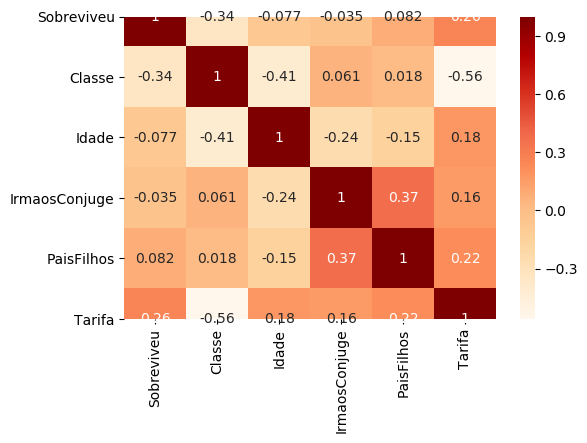

In [28]:
f, ax = plt.subplots(dpi=100)  # So para aumentar o tamanho
sns.heatmap(data.corr(), annot=True, cmap='OrRd')  # OrRd = Orange Red
plt.show()

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [29]:
data.drop('Sobreviveu', axis=1, inplace=True)

### Checar dados nulos

In [30]:
data.isnull().sum()  # como podemos ver foi removido a coluna sobreviveu

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

Queremos apenas pegar os titulos das pessoas. Ex: Mr, Mrs, Miss e etec...
- 'a-zA-Z' - Pega todos os caracteres de A a Z maiusculo e minusculo
- '+' - Traz todas as plavras que contem de A a Z, mas somente a primeira palavra da linha
- '\.' - Nesse caso vai pegar todas as palavras seguidas de 1 ponto, atentesse que vai fora dos parenteses

In [31]:
data['Nome'].str.extract('([a-zA-Z]+)\.').head(3)

,0
PassengerId,
1,Mr
2,Mrs
3,Miss


Substituindo o nome das pessoas apenas para sua titulação, nesse caso os nomes nao importam, apenas os titulos

In [32]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [33]:
data.Titulo.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [34]:
pd.crosstab(data.Titulo, data.Sexo)  # Aqui podemos ver os titulos e a que sexo se refere

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


O lambda vai receber cada linha da nossa coluna e vai aplicar a condição.
Vamos pegar os titulos que tem poucos numeros (numeros que acabam nao sendo relevantes para nossa predição) e colocalos na categoria "Outros"
Algoritmo: Retorne outros caso o elemento em questao não estiver dentro da lista que contem os titulos, se nao retorna o proprio titulo que faz parte da lista

In [35]:
data['Titulo'] = data.Titulo.apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [36]:
pd.crosstab(data['Titulo'], data['Sexo'])  # Cruzando os dados de titulo e sexo

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [37]:
titulos_traduzidos = {
    'Master' : 'Menino',
    'Miss' : 'Solteira',
    'Mr' : 'HomemAdulto',
    'Mrs' : 'Casada'
}

In [38]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

In [39]:
data.Titulo  # Alterou tudo bonito

PassengerId
1       HomemAdulto
2            Casada
3          Solteira
4            Casada
5       HomemAdulto
           ...     
1305    HomemAdulto
1306            NaN
1307    HomemAdulto
1308    HomemAdulto
1309         Menino
Name: Titulo, Length: 1309, dtype: object

### Averiguar informações do DataFrame

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Classe           1309 non-null int64
Nome             1309 non-null object
Sexo             1309 non-null object
Idade            1046 non-null float64
IrmaosConjuge    1309 non-null int64
PaisFilhos       1309 non-null int64
Bilhete          1309 non-null object
Tarifa           1309 non-null float64
Embarque         1309 non-null object
Titulo           1275 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [41]:
data.drop('Bilhete', axis=1, inplace=True)

In [42]:
data.drop('Nome', axis=1, inplace=True)

In [43]:
# data.drop(['Nome', 'Bilhete'], axis=1, inplace=True)  # Poderia ter excluido as 2 de uma vez tambem

In [44]:
data.columns  # Excluimos as 2

Index(['Classe', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos', 'Tarifa',
       'Embarque', 'Titulo'],
      dtype='object')

# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

Sabemos que nos homens, as crianças sao chamadas de Master, por isso sao meninos, mas nao temos como saber quem sao as meninas da coluna Solteira.
Por isso vamos usar a logica e pensar que se uma Solteira esta com os pais ou nao tem filhos há uma possibilidade muito grande de ser uma menina. E é usando essa logica que vamos chutar que quando a coluna pais e filhos for 1 ou mais sera uma mulher adulta Solteira, do cotrario sera menina

In [45]:
solteiras_com_pais = data.loc[(data.Titulo == 'Solteira') & (data.PaisFilhos >= 1)]
solteiras_com_pais

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [46]:
solteiras_com_pais.Idade.mean()

12.178815789473683

### verificar distribuição da idade

C:\Users\Arakaki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Arakaki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


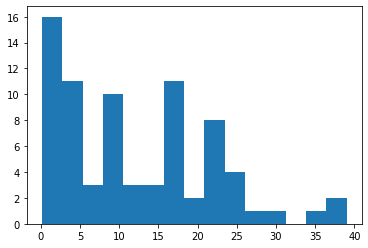

In [47]:
plt.hist(solteiras_com_pais.Idade, bins=15)

plt.show()

### Média de mulheres "solteiras"

In [48]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()  # media de idade de mulheres solteiras

21.774238095238097

So pegamos essa media para observarmos que a media das mulheres solteiras como um todo é muito maior do que a media das mulheres solteiras que estao acompanhadas dos pais 

### Distribuição das idades de mulheres "solteiras"

Somente para vermos a diferença

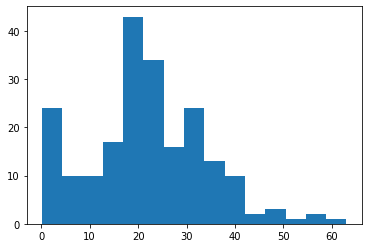

In [49]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [50]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

Somente para vermos a diferença

### Distribuição das idades de mulheres "casadas"

Somente para vermos a diferença

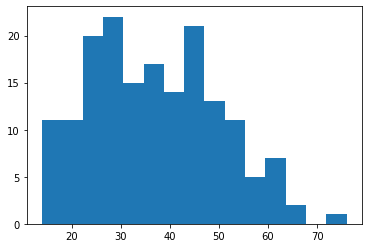

In [51]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"

In [52]:
solteiras_com_pais.index  # Só para vermos os indices 

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [53]:
data['solteiras_com_pais'] = 0  # add a coluna e coloca 0 em todas as linhas

In [54]:
data.solteiras_com_pais

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: solteiras_com_pais, Length: 1309, dtype: int64

A ideia é transformar em 1 todas as linhas que forem mulheres solteiras com pais

In [55]:
for idx, _ in data.iterrows():  # intere cada linha do dataframe
    if idx in solteiras_com_pais.index:  # se conter o index em solteirascompais
        data['solteiras_com_pais'].at[idx] = 1  # entao coloque o 1 no index

solteiras com pais = 1 sig que provavelmente sao crianças, e conseguimos analisar isso na media da idade de cada grupo

In [56]:
data.loc[data['solteiras_com_pais']==1]['Idade'].mean()

12.178815789473683

solteiras com pais = 0 sig que provavelmente nao sao crianças

In [57]:
data.loc[data['solteiras_com_pais']==0]['Idade'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"

Basicamente vamos pegar os dados categoricos (que sao escritos) e transforma-los em binarios (0 ou 1)

So antes vamos transformar o sexo para um dado numerico (binario) para nao precisar transformar ele com o dummies

In [58]:
data['Sexo'] = data['Sexo'].map({'homem': 0, 'mulher': 1})

In [59]:
data.Sexo.head(3)

PassengerId
1    0
2    1
3    1
Name: Sexo, dtype: int64

- Lembrando que o drop first pega uma coluna categorica e coloca ela em outra coluna onde se torna binario. 
- Ex: cor: vermelho, amarelo > drop_first > cor: 0, 1 (onde 0 é vermelho e 1 amarelo)

In [60]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [61]:
data

,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,NaN,0,0,8.0500,0,0,1,0,1,1,0,0
1306,1,39.0,0,0,108.9000,0,0,0,0,0,0,0,0
1307,0,38.5,0,0,7.2500,0,0,1,0,1,1,0,0


### Separar train e test para idades
Basicamente vamos separar os dados nulos dos nao nulos. As linhas das idades que sao nulas vao para o test, o train vai ficar com todas os outros dados normais
* treinar com dados não nulos
* aplicar modelo em dados nulos

- O objetivo aqui é ter 2 arquivos, um onde vou predizer os dados e o outro onde vou aplicar.
- O de treino é de onde vou tirar as informações, e o outro é o que vou aplicar

In [62]:
data.isnull().sum()  # So vendo quantos dados tem nulos

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteiras_com_pais      0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [63]:
train_idade = data.dropna()  # todos os dados nulos sao removidos

In [64]:
test_idade = data.loc[data['Idade'].isnull()]  # somente os passageiros que as idades sao nulas

Primeiro passamos todos os dados de onde a idade é igual a 0, lembrando que todos os dados sig todas as colunas, ou seja, o data todo. E depois vou dropar somente a coluna idade, ficando com o restante que tinha a idade 0

In [66]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)  # Vou excluir porque nao vou querer essa coluna

In [67]:
test_idade

,Sexo,IrmaosConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
6,0,0,0,8.4583,0,0,1,1,0,1,0,0
18,0,0,0,13.0000,0,1,0,0,1,1,0,0
20,1,0,0,7.2250,0,0,1,0,0,0,0,0
27,0,0,0,7.2250,0,0,1,0,0,1,0,0
29,1,0,0,7.8792,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,0,1,1,0,0,0,1
1302,1,0,0,7.7500,0,0,1,1,0,0,0,1
1305,0,0,0,8.0500,0,0,1,0,1,1,0,0


In [68]:
train_idade.shape, test_idade.shape  # Como podemos ver um esta com a idade zerada e o outro esta sem idade

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

Aqui o ideial não é usarmos todos os dados para treino, porque se usarmos todos ele ja vai ter a resposta, e queremos saber se ele vai predizer corretamente com poucos dados. por isso devemos usar somente uma parte

In [69]:
X = train_idade.drop('Idade', axis=1)  # o X fica sem a coluna Idade

In [70]:
y = train_idade['Idade']  # O y fica so com a coluna idade agora

In [71]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [73]:
from sklearn import linear_model

### Instanciar modelo

In [74]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [76]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [79]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [80]:
X_test.shape, y_test.shape

((314, 12), (314,))

### Treinar modelo

In [81]:
lm.fit(X_train, y_train)  # fit - se adequa aos dados que sao passados

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fazer predição

O y_test é o valor real, e o pred é o valor que previmos

In [82]:
pred = lm.predict(X_test)
pred

array([14.12110503, 12.4187869 , 52.02508717, 43.6901123 , 31.72564127,
       38.39128657, 41.94963431, 31.02731584, 31.68297434, 11.43444576,
       39.01758928, 35.8116427 , 42.52233119, 36.60250051, 41.67584006,
       32.68864895, 26.18333514, 39.50704186, 29.0878736 , 31.42623659,
       22.5851548 , 25.18481205, 25.16374449, 42.44457071, 22.58583064,
       29.69362642, 33.28929187, 35.98619052, 26.16200168, 26.11990873,
       42.29371606, 32.66731548, 34.7035367 ,  7.5419187 , 28.14669688,
       27.204596  , 42.52563787, 29.09011362, 42.52094451, 29.08357107,
       32.11852259, 29.08666442,  7.84908548, 26.11987289, 11.02716605,
       22.58821316, 39.32169783, 31.68297434, 29.10245119, 29.09733115,
       22.5851548 , 30.76263359, 26.16200168, 42.52094451, -0.90893363,
       35.25034936, 29.08357107, 28.14883023, 29.08879777, 28.14669688,
       21.67989399, 29.09011362, 29.09114445, 46.46075369, 29.09096695,
       32.78046418, 42.52563787, 43.80523339, 41.45803333, 33.34

### Importar mean_squared_error (erro quadrado médio)

In [83]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [86]:
lm.score(X_test, y_test)  # Esse é o R quadrado, que diz quao bem bem nosso modelo funcionou em relação a media

0.4805876982432238

### Averiguar rmse

In [88]:
mse = mean_squared_error(y_test, pred)  # como se fosse o erro medio

In [89]:
rmse = np.sqrt(mse)  # Como se fosse o desvio padrao | Ele vai errar 10 pra cima ou para baixo no max
rmse

10.363417349081386

### Visualizar resíduos em scatterplot

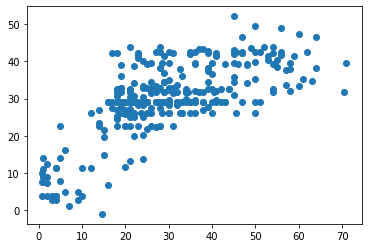

In [90]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [91]:
test_idade.shape

(263, 12)

In [93]:
pred_idade = lm.predict(test_idade)
pred_idade

array([31.66280076, 32.66731548, 27.01654229, 26.11990873, 25.16242864,
       29.09011362, 38.54448471, 25.16353115, 26.11987289, 26.11418454,
       29.08879777, 30.72930409, 25.16353115, 24.24975121, 42.44457071,
       39.53502454,  0.97513433, 29.09011362, 29.08879777, 25.16321115,
       29.08879777, 29.08879777, 29.09011362, 29.09114445, 24.15017649,
       29.08879777, 31.66884496,  5.85317588, 30.38260082, 29.09509114,
       29.08357107, -0.90893363, 44.89205479, 42.52627788,  2.11703027,
        4.02980162, 29.67389296, 42.32083661, 31.62593765, 31.66884496,
       25.16353115, 25.01124061, 30.79543783, 29.09011362,  7.05576553,
       22.58775065, 18.67949824, 24.22399028, 29.09562448, 39.99236621,
       31.66884496, 25.16353115, 42.48297094, 25.16353115, 32.7782495 ,
       42.52563787, 39.53502454, 42.48723764, 25.16353115, 29.78976322,
       28.74503556, 29.08879777, 32.32005301, 25.01124061, 23.28444941,
       41.63024529, 29.09011362, 29.04333044, 42.4488374 , 26.11

In [94]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [95]:
test_idade['Idade'] = pred_idade  # Passa as predicoes para o test_idade

In [96]:
test_idade.isnull().sum()  # Agora podemos ver que nao temos mais dados nulos

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [97]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [98]:
idade = pd.concat([train_idade, test_idade], sort=False)

In [99]:
idade.isnull().sum()  # So confirmando

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [101]:
idade.shape

(1309, 13)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [102]:
idade_completa = pd.DataFrame({'IdPassageiro' : idade.index, 'Idade': idade['Idade']})

In [103]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.163780
1302,1302,25.163531
1305,1305,29.088798


### Salvar CSV com idade completa

In [105]:
idade_completa.to_csv('idade_completa.csv', index=False)